In [594]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [595]:
test_data = pd.read_csv('../data/Test.csv')
test_data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [596]:
train_data = pd.read_csv('../data/Train.csv')
train_data.head()
# test_data.head()


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [597]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [598]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,8068.0,463479.214551,2595.381232,458982.0,461240.75,463472.5,465744.25,467974.0
Age,8068.0,43.466906,16.711696,18.0,30.00,40.0,53.00,89.0
Work_Experience,7239.0,2.641663,3.406763,0.0,0.00,1.0,4.00,14.0
Family_Size,7733.0,2.850123,1.531413,1.0,2.00,3.0,4.00,9.0


In [599]:
train_data.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

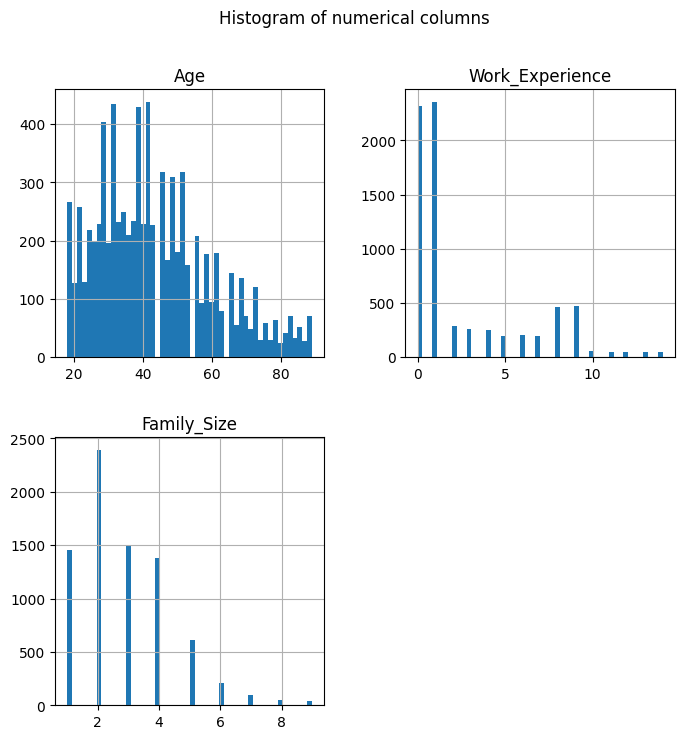

<Figure size 640x480 with 0 Axes>

In [600]:
train_data[['Age', 'Work_Experience', 'Family_Size']].hist(bins=50, figsize=(8, 8))
plt.suptitle('Histogram of numerical columns')
plt.show()

plt.savefig('../figures/hist.jpeg')

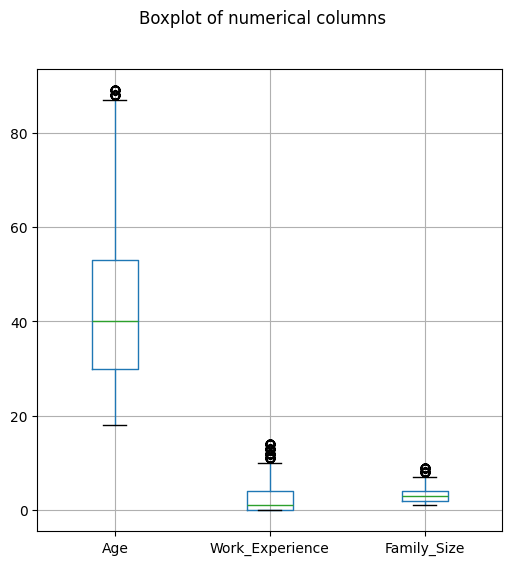

<Figure size 640x480 with 0 Axes>

In [601]:
train_data[['Age', 'Work_Experience', 'Family_Size']].boxplot(figsize=(6, 6))
plt.suptitle("Boxplot of numerical columns")
plt.show()

plt.savefig('../figures/boxplot.jpeg')

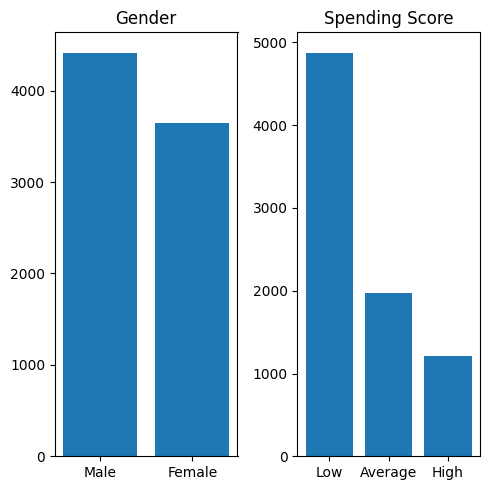

In [602]:
fig, ax = plt.subplots(1,2, figsize=(5,5))

gender_count = train_data['Gender'].value_counts()
ax[0].bar(gender_count.index, gender_count.values)
ax[0].set_title('Gender')

spending_count = train_data['Spending_Score'].value_counts()
ax[1].bar(spending_count.index, spending_count.values)
ax[1].set_title('Spending Score')

plt.tight_layout()

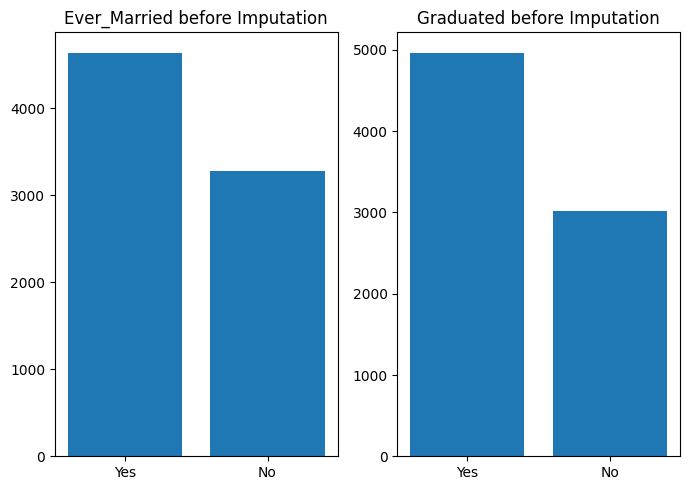

In [603]:
fig, ax = plt.subplots(1,2, figsize=(7,5))

married_count = train_data['Ever_Married'].value_counts()
ax[0].bar(married_count.index, married_count.values)
ax[0].set_title('Ever_Married before Imputation')

graduated_count = train_data['Graduated'].value_counts()
ax[1].bar(graduated_count.index, graduated_count.values)
ax[1].set_title('Graduated before Imputation')

plt.tight_layout()

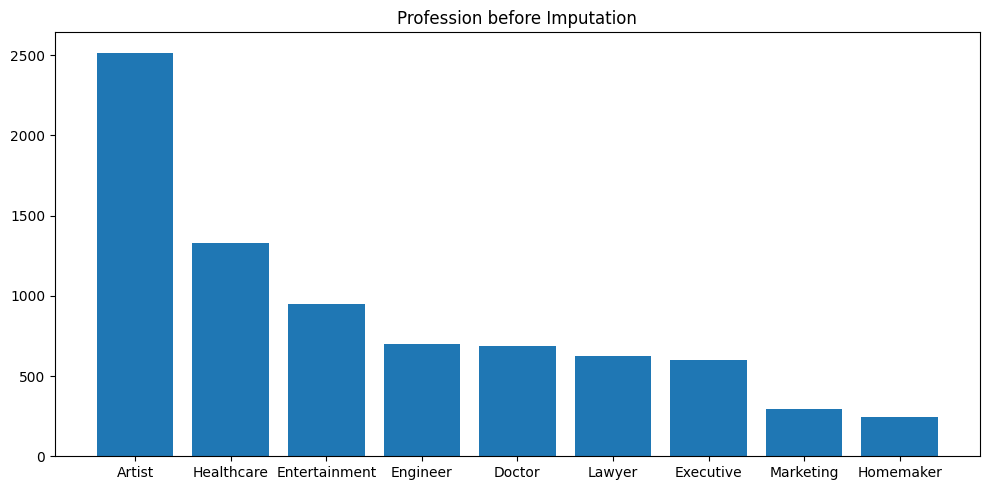

In [604]:
fig, ax = plt.subplots(figsize=(10,5))

prof_count = train_data['Profession'].value_counts()
ax.bar(prof_count.index, prof_count.values)
ax.set_title('Profession before Imputation')

plt.tight_layout()

In [605]:
numeric_feature = ['Age', 'Work_Experience', 'Family_Size']
onehot_feature = ['Gender', 'Ever_Married', 'Graduated', 'Profession']
label_feature = ['Spending_Score']

In [606]:
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [607]:
onehot_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [608]:
label_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('label', OrdinalEncoder())
])

In [609]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_feature),
        ('onehote', onehot_pipeline, onehot_feature),
        ('label', label_pipeline, label_feature)
    ]
)

In [610]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])

In [611]:
train_data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [612]:
train_data = pipeline.fit_transform(train_data)

feature_names = (
    pipeline.named_steps['preprocessor'].get_feature_names_out()
)
train_data = pd.DataFrame(train_data, columns=feature_names)
train_data


,num__Age,num__Work_Experience,num__Family_Size,onehote__Gender_Female,onehote__Gender_Male,onehote__Ever_Married_No,onehote__Ever_Married_Yes,onehote__Graduated_No,onehote__Graduated_Yes,onehote__Profession_Artist,onehote__Profession_Doctor,onehote__Profession_Engineer,onehote__Profession_Entertainment,onehote__Profession_Executive,onehote__Profession_Healthcare,onehote__Profession_Homemaker,onehote__Profession_Lawyer,onehote__Profession_Marketing,label__Spending_Score
0,-1.284623,-0.451136,0.762698,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
1,-0.327151,-0.451136,0.095802,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.408268,-0.451136,-1.237990,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,1.408268,-0.757410,-0.571094,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,-0.207467,-0.451136,2.096491,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,-1.284623,-0.757410,2.763387,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
8064,-0.506677,0.161413,0.762698,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
8065,-0.626361,-0.451136,-1.237990,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
8066,-0.985413,-0.451136,0.762698,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0


In [613]:
# pca = PCA(n_components=2)
# reduced_train_data = pca.fit_transform()

In [614]:
sse = []
k_range = range(1,15)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=32)
    km.fit(train_data.iloc[:, 1:])
    sse.append(km.inertia_)

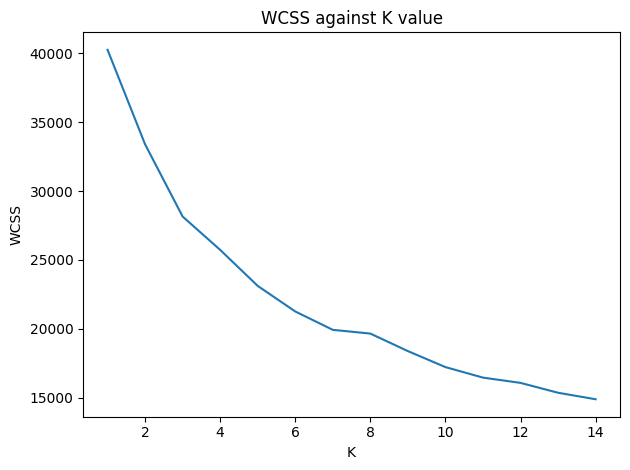

In [615]:
plt.plot(k_range, sse)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.title('WCSS against K value')
plt.tight_layout()

In [ ]:
model_kmeans = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler),
    ('kmeans', KMeans(n_clusters=6))
])

In [617]:
train_data.isnull().sum()

num__Age                             0
num__Work_Experience                 0
num__Family_Size                     0
onehote__Gender_Female               0
onehote__Gender_Male                 0
onehote__Ever_Married_No             0
onehote__Ever_Married_Yes            0
onehote__Graduated_No                0
onehote__Graduated_Yes               0
onehote__Profession_Artist           0
onehote__Profession_Doctor           0
onehote__Profession_Engineer         0
onehote__Profession_Entertainment    0
onehote__Profession_Executive        0
onehote__Profession_Healthcare       0
onehote__Profession_Homemaker        0
onehote__Profession_Lawyer           0
onehote__Profession_Marketing        0
label__Spending_Score                0
dtype: int64